# CatHub Tutorial

This tutorial is developed in connection to the SUNCAT Summer Institute 2023. The CatHub code is a Python API to access the Surface Reactions database on [Catalysis-Hub.org](http://www.catalysis-hub.org). The module includes a command line interface (in your terminal) as well as a Python interface to access and upload data. In this tutorial you will learn how to access catalysis-hub.org data via the Python interface.

## Installing cathub
To install CatHub use pip:

    $ pip3 install git+https://github.com/SUNCAT-Center/CatHub.git --upgrade --user

which will install CatHub and all their dependencies.

To test that the cathub cli is working, start by typing in your terminal:

    $ cathub --help

and you should see a list of subcommands. If it’s not working you probably have to add the installation path to PATH in your `~/.bashrc`. This would typically be `export PATH=~/.local/bin:${PATH}` for Linux, and `export PATH~/Library/PythonX.Y/bin:${PATH}` for Mac.


## Demo 1: Querying adsorption energetics from Catalysis-hub
In this demonstration you will learn how to fetch adsorption energies from Catalysis-hub.org

Start by familiarizing yourself with the datasets on the main webpage http://www.catalysis-hub.org/publications

Data is divided into distinct datasets, usually belonging to a particular publication. A dataset is queried based on the "pub_id"  which is a a unique dataset id constructed from title, first author name and publication year. In this example we will start by using our recent dataset https://www.catalysis-hub.org/publications/SainiElectronic2022, publication: https://www.nature.com/articles/s41524-022-00846-z


### Fetching data in Python
To connect to the catalysis-hub.org server in your Python script, start by importing the cathub SQL interface and create a database connection to the catalysis-hub server:

In [1]:
from cathub.cathubsql import CathubSQL
db = CathubSQL()

Then use the `get_dataframe()` method to query adsorption energy data into a pandas dataframe ( Basic syntax for Pandas is found [here](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html#min-tut-03-subset) )

Inspect the dataframe by printing it to your terminal/notebook. Main columns consists of the <b> chemicalComposition </b> (chemical formula of the total slab), <b>surface_composition</b> (reduced chemical composition with surface specific tags), <b> equation </b> (equation for the reaction), and <b>reaction_energy </b> (which can also be an adsorption energy).

In [2]:
pub_id = "SainiElectronic2022"
dataframe = db.get_dataframe(pub_id=pub_id, include_atoms=True)
print(dataframe)
dataframe.to_pickle(pub_id + '.pickle')

Querying database

     reaction_id chemical_composition    surface_composition facet  \
0         436197           Au55Hf16W9   Au55Hf16W9-fcc-SPIN2   111   
1         436198              Ag4Au20        AgAu5-fcc-SPIN2   111   
2         436199              Ag4Au20        AgAu5-fcc-SPIN2   111   
3         436200              Ag4Au20        AgAu5-fcc-SPIN2   111   
4         436201              Fe4Pt20        FePt5-fcc-SPIN1   111   
..           ...                  ...                    ...   ...   
436       436633              Cu20Hf4        Cu5Hf-fcc-SPIN2   111   
437       436634          Au55Ir9Re16  Au55Ir9Re16-fcc-SPIN2   111   
438       436635              Cu20Ti4        Cu5Ti-fcc-SPIN2   111   
439       436636              Cu20Ti4        Cu5Ti-fcc-SPIN2   111   
440       436637              Cu20Ti4        Cu5Ti-fcc-SPIN2   111   

                    sites coverages                                reactants  \
0     {'Ostar': 'hollow'}      None                {'star': 

## Inspecting the data
To continue the analysis, please save the dataframe into a pickle file on your local workspace. Now you can examine the your local file without pulling from the server.

Next, select specific columns (basic pandas syntax) for a better visualization of the data.

In [3]:
import pandas
pub_id = "SainiElectronic2022"
dataframe = pandas.read_pickle(pub_id + '.pickle')

print(dataframe.columns)
print(dataframe[['chemical_composition', 'surface_composition','facet', 'equation', 'reaction_energy']].to_markdown())

Index(['reaction_id', 'chemical_composition', 'surface_composition', 'facet',
       'sites', 'coverages', 'reactants', 'products', 'reaction_energy',
       'activation_energy', 'dft_code', 'dft_functional', 'username', 'pub_id',
       'atoms_name', 'atoms_id', 'doi', 'atoms', 'equation'],
      dtype='object')
|     | chemical_composition   | surface_composition   |   facet | equation                     |   reaction_energy |
|----:|:-----------------------|:----------------------|--------:|:-----------------------------|------------------:|
|   0 | Au55Hf16W9             | Au55Hf16W9-fcc-SPIN2  |     111 | 0.5O2(g) + * -> O*           |         0.372479  |
|   1 | Ag4Au20                | AgAu5-fcc-SPIN2       |     111 | 0.5N2(g) + * -> N*           |         3.11017   |
|   2 | Ag4Au20                | AgAu5-fcc-SPIN2       |     111 | 0.5O2(g) + * -> O*           |         0.556591  |
|   3 | Ag4Au20                | AgAu5-fcc-SPIN2       |     111 | CH4(g) - 1.5H2(g) + * -> CH*

## Atomic structures

The atomic structures are also stored in the dataframe (as ASE Atoms objects). And the structures for a spefific reaction can be selected like this:


In [14]:
from ase.visualize import view
reaction_id = 4
atoms_list = dataframe['atoms'][reaction_id]
atoms_name = dataframe['atoms_name'][reaction_id]
print(atoms_name)
idx = 2

view(atoms_list[idx], viewer='ngl')

['star', 'N2gas', 'Nstar']


To select all empty slab geometries, do like this:

In [8]:
atoms_list = []
for id, row in dataframe.iterrows():
    for name, atoms in zip(row['atoms_name'], row['atoms']):
        if name == 'Nstar':
            atoms_list += [atoms]

view(atoms_list)

<Popen: returncode: None args: ['/Users/winther/.pyenv/versions/3.9.7/bin/py...>

/Users/winther/Dropbox/SUNCAT/software/ase/ase/gui/images.py:100: UserWarning: Not all images have the same boundary conditions!
  warnings.warn('Not all images have the same boundary conditions!')
Traceback (most recent call last):
  File "/Users/winther/.pyenv/versions/3.9.7/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/winther/.pyenv/versions/3.9.7/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/winther/Dropbox/SUNCAT/software/ase/ase/gui/pipe.py", line 32, in <module>
    main()
  File "/Users/winther/Dropbox/SUNCAT/software/ase/ase/gui/pipe.py", line 28, in main
    plt.show()
  File "/Users/winther/.pyenv/versions/3.9.7/lib/python3.9/site-packages/matplotlib/pyplot.py", line 389, in show
    return _get_backend_mod().show(*args, **kwargs)
  File "/Users/winther/.pyenv/versions/3.9.7/lib/python3.9/site-packages/matplotlib_inline/backend_inline.py", line 41, in show
 

### Filtering the data

Data can be filtered using pandas syntax, for example selecting a specific chemical reaction like this: 


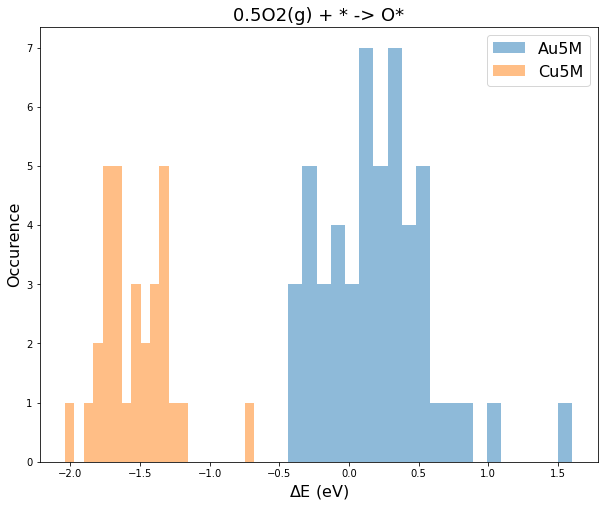

In [9]:
equation = '0.5O2(g) + * -> O*'  

loc1 = (dataframe["equation"] == equation) & (dataframe['surface_composition'].str.contains('Au5'))
loc2 = (dataframe["equation"] == equation) & (dataframe['surface_composition'].str.contains('Cu5'))
dataframe_1 = dataframe[loc1]
dataframe_2 = dataframe[loc2]

import pylab as p
p.figure(figsize=(10,8))
p.hist(dataframe_1['reaction_energy'].values, bins=20, alpha=0.5, label='Au5M')
p.hist(dataframe_2['reaction_energy'].values, bins=20, alpha=0.5, label='Cu5M')
p.title('0.5O2(g) + * -> O*', fontsize=18)
p.ylabel('Occurence', fontsize=16)
p.xlabel('$\Delta$E (eV)', fontsize=16)
p.legend(prop={'size':16})
p.show()

### Challenge: Refine query based on chemical composition, adsorbates and facet
It is also posible to filter the data already on the level of the cathub query, and to search across publications

In [10]:
dataframe2 = db.get_dataframe(reactants={'COgas': 1},
                              products={'COstar': 1},
                              #elements=['Cu', 'Al'], #contains Cu and Al
                              surface_composition='Cu', # match specific composition
                              facet = '100'
                                )
print(dataframe2[['pub_id', 'surface_composition', 'reaction_energy', 'dft_functional']].to_markdown())

Querying database

|    | pub_id                        | surface_composition   |   reaction_energy | dft_functional     |
|---:|:------------------------------|:----------------------|------------------:|:-------------------|
|  0 | TangFrom2020                  | Cu-fcc                |         -0.649572 | BEEF-vdW           |
|  1 | PengRole2020                  | Cu-fcc                |         -0.649572 | BEEF-vdW           |
|  2 | PengRole2020                  | Cu-fcc                |         -0.495651 | BEEF-vdW           |
|  3 | PengRole2020                  | Cu-fcc                |         -0.595639 | BEEF-vdW           |
|  4 | Gauthierrole2021              | Cu                    |          0.635223 | RPBE_-0.413VSHE    |
|  5 | Gauthierrole2021              | Cu                    |         -0.722366 | RPBE_-0.413VSHE    |
|  6 | Gauthierrole2021              | Cu                    |          0.131535 | RPBE_-0.413VSHE    |
|  7 | PengTrends2022                | Cu-fcc